In [16]:
# Import matplotlib
import matplotlib.pyplot as plt

# Other packages
import numpy as np
import xarray as xr

In [17]:
# Open our dataset
ds = xr.open_dataset("../../data_samples/netcdf/E-OBS/UK_monthly.nc")

# Compute the climatology
climato = ds.mean("time")

## 2D plot types

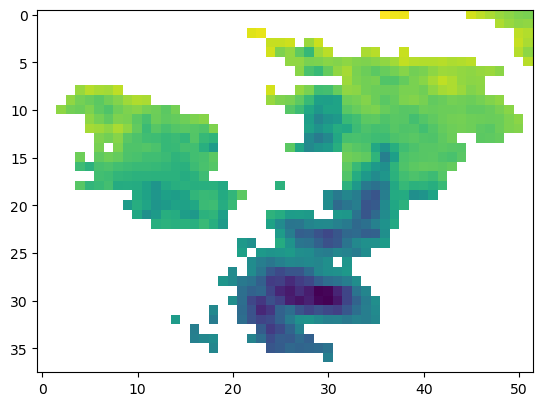

In [18]:
# matplotlib includes functions to plots 2D data
# imshow is the most basic one, displays the pixels in the 2D array
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.imshow(climato.tg) # Plot the temperature image

## Show
plt.show()

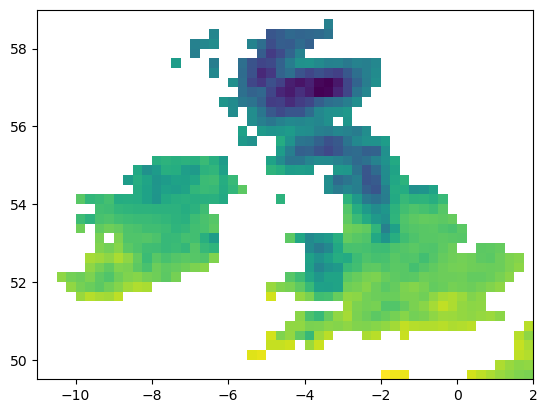

In [19]:
#pcolormesh is similar, but offers more flexibility
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude,  # coordinates
                  climato.tg # 2D data
                 ) 

## Show
plt.show()

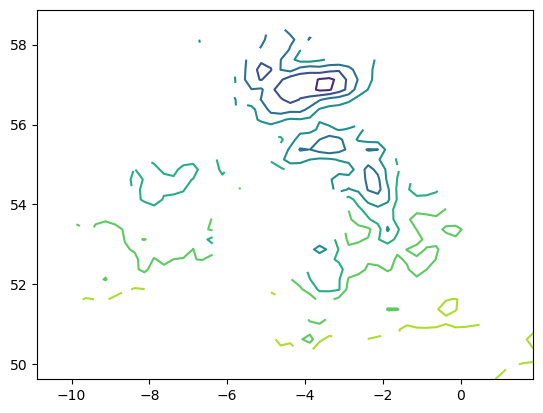

In [20]:
# Contours (not the best suited for this data with NaNs)
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.contour(climato.longitude, climato.latitude,  # coordinates
                  climato.tg # 2D data
                 ) 

## Show
plt.show()

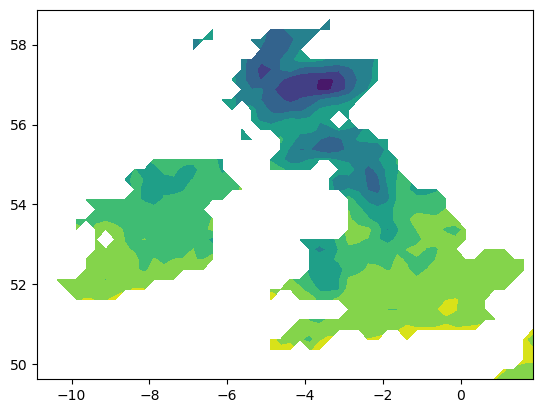

In [21]:
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude,  # coordinates
                  climato.tg # 2D data
                 ) 

## Show
plt.show()

## Create a map with cartopy
cartopy allows to create maps with projections

In [23]:
# import cartopy crs
import cartopy.crs as ccrs

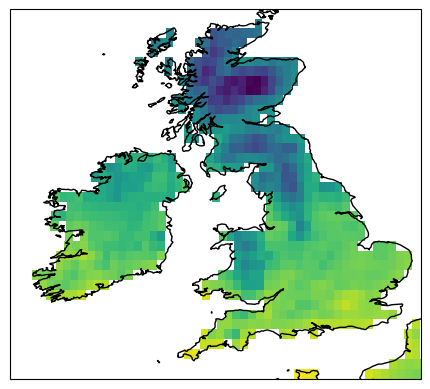

In [24]:
# Basic skeleton
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.Robinson()) # Add the projection in the axis creation

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), # Add the transform in the plotting function
                 ) 

## Add the coastlines
ax.coastlines()

## Show
plt.show()

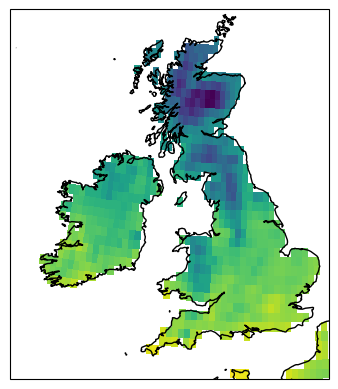

In [25]:
# Test other projections from https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) # Add the projection in the axis creation

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), # Add the transform in the plotting function
                 ) 

## Add the coastlines
ax.coastlines()

## Show
plt.show()

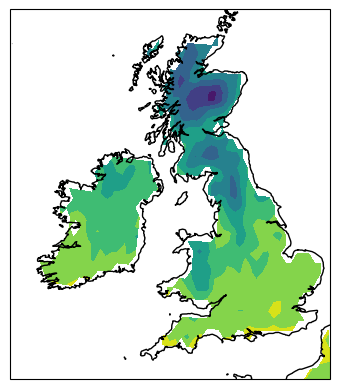

In [26]:
# You can then mix with different types of matplotlib plots
## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) # Add the projection in the axis creation

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), # Add the transform in the plotting function
                 ) 

## Add the coastlines
ax.coastlines()

## Show
plt.show()

## Plot customization

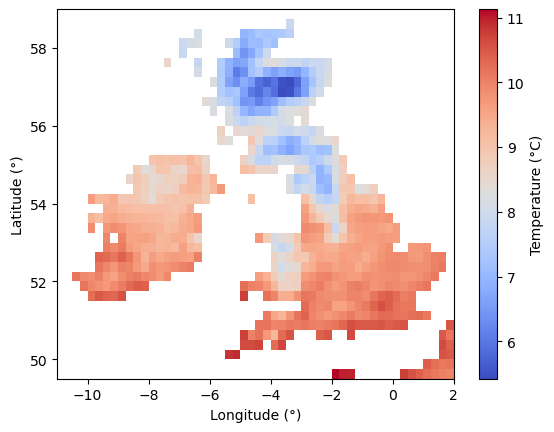

In [27]:
# Add a colorbar
## Setup the figure
fig = plt.figure() 
ax = plt.axes() 

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude, climato.tg,
                  cmap = "coolwarm", # Change colormap
                 ) 

## Add colorbar
plt.colorbar(p, 
             label = "Temperature (°C)" # Add colorbar label
            )
## Customization
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

## Show
plt.show()

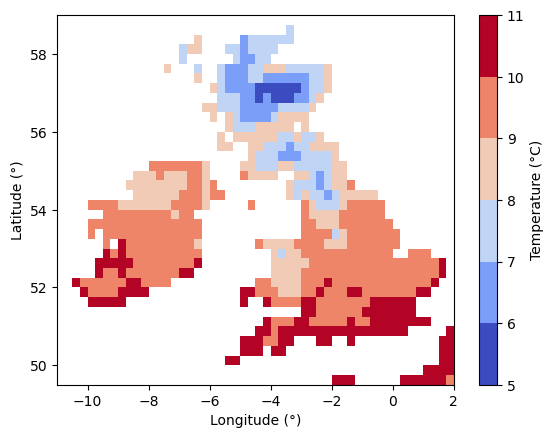

In [37]:
# Control colorbar levels with norm
from matplotlib.colors import BoundaryNorm

## Setup the figure
fig = plt.figure() 
ax = plt.axes() 

## Add the graphics
p = ax.pcolormesh(climato.longitude, climato.latitude, climato.tg,
                  cmap = "coolwarm", # Change colormap
                  norm = BoundaryNorm(np.arange(5,11.1,1), 256), # Set norm: BoundaryNorm allows for specifying discrete boundaries
                 ) 

## Add colorbar
plt.colorbar(p, 
             label = "Temperature (°C)" # Add colorbar label
            )
## Customization
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

## Show
plt.show()

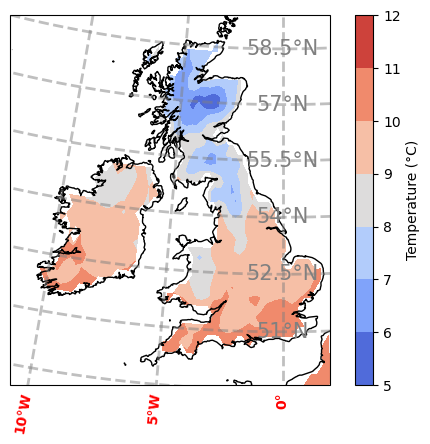

In [39]:
# Gridlines customizations (cartopy)
import matplotlib.ticker as mticker

## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), 
                  cmap = "coolwarm", 
                levels = 6, vmin = 5, vmax = 12, # With countourf, you can use norm, or simply specify the number of levels and boundaries
                 ) 

## Add colorbar
plt.colorbar(p, 
             label = "Temperature (°C)",
            )

## cartopy customization
ax.coastlines() 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', # Customize gridlines style
                 )
gl.top_labels = False # Hide longitude labels on top
gl.left_labels = False # Hide latitude labels on the left
gl.xlocator = mticker.FixedLocator([-10, -5, 0]) # Set position of longitude labels
gl.ylabel_style = {'size': 15, 'color': 'gray'} # Change the style of latitude labels
gl.xlabel_style = {'color': 'red', 'weight': 'bold'} # Change the style of longitude labels

## Show
plt.show()

/Users/bourdin/Softs/miniconda3/envs/spyder-env/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


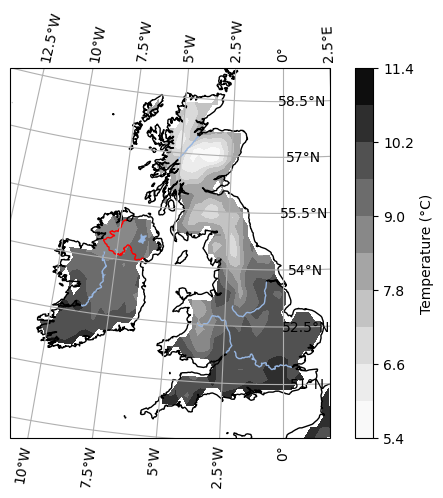

In [72]:
# Add pre-defined features
import cartopy.feature as cfeature

## Setup the figure
fig = plt.figure() 
ax = plt.axes(projection = ccrs.NorthPolarStereo()) 

## Add the graphics
p = ax.contourf(climato.longitude, climato.latitude, climato.tg,
                  transform = ccrs.PlateCarree(), 
                  cmap = "Greys", # Different colormap: Find all of them here: https://matplotlib.org/stable/users/explain/colors/colormaps.html
                levels = 10, 
                 ) 

## Add colorbar
plt.colorbar(p, label = "Temperature (°C)",)

## cartopy customization
ax.coastlines() 
ax.gridlines(draw_labels=True,)

## FEATURES
ax.add_feature(cfeature.RIVERS,)
ax.add_feature(cfeature.LAKES,)
ax.add_feature(cfeature.BORDERS, color = "red")
    
## Show
plt.show()

## Use cartopy with xarray's plot
Sometimes, you want to use xarray's quick plot function, but do need some of cartopy's functionnalities (e.g. coastlines, projections). Here is how to do it.

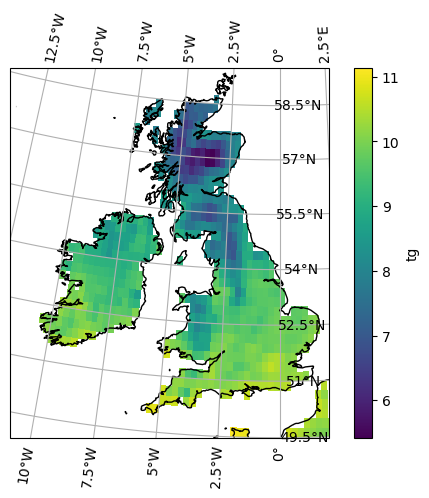

In [45]:
# Create your plot and call cartopy with subplot_kws
p = climato.tg.plot(
    subplot_kws = {"projection":ccrs.NorthPolarStereo()}, # Projection
    transform = ccrs.PlateCarree(), # Transform
)
# Customize by accessing p's axes :
p.axes.coastlines()
p.axes.gridlines(draw_labels = True)

## Your turn!
Create a map of precipitation. Try different projections, different colormaps, different norms. Don't forget all the appropriate labels. 